In [1]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.preprocessing import Imputer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("MVC.csv")
print(data.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NUMTIME'],
      dtype='object')


In [4]:
feature_cols = data.columns[4]
resp_col = data.columns[11]
x = data[feature_cols].copy()
y = data[resp_col].copy()

In [5]:
def borough(x):
    if x=="QUEENS":
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5

In [6]:
data['BOROUGH2']=data['BOROUGH'].apply(borough)
print(borough)

<function borough at 0x1a1701dd40>


In [7]:
valuablecols=['NUMTIME','BOROUGH']
def replace_missing_value(data, valuablecols):

    imputer = Imputer(strategy="median")
    df_num = data[valuablecols]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def
data["NUMTIME"] = replace_missing_value(data,["NUMTIME"])
data = data.dropna(how='any', subset=['BOROUGH','NUMTIME','NUMBER OF PERSONS INJURED','LONGITUDE','LATITUDE','CONTRIBUTING FACTOR VEHICLE 1'])
print(data.isnull().any())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


CRASH DATE                       False
CRASH TIME                       False
BOROUGH                          False
ZIP CODE                          True
LATITUDE                         False
LONGITUDE                        False
LOCATION                         False
ON STREET NAME                    True
CROSS STREET NAME                 True
OFF STREET NAME                   True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED          True
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1    False
CONTRIBUTING FACTOR VEHICLE 2     True
CONTRIBUTING FACTOR VEHICLE 3     True
CONTRIBUTING FACTOR VEHICLE 4     True
CONTRIBUTING FACTOR VEHICLE 5     True
COLLISION_ID                     False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2      

In [8]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
data['affected']=data['NUMBER OF PERSONS INJURED']+data['NUMBER OF PERSONS KILLED']
data['affected'] = data['affected'].apply(injured_to_binary)

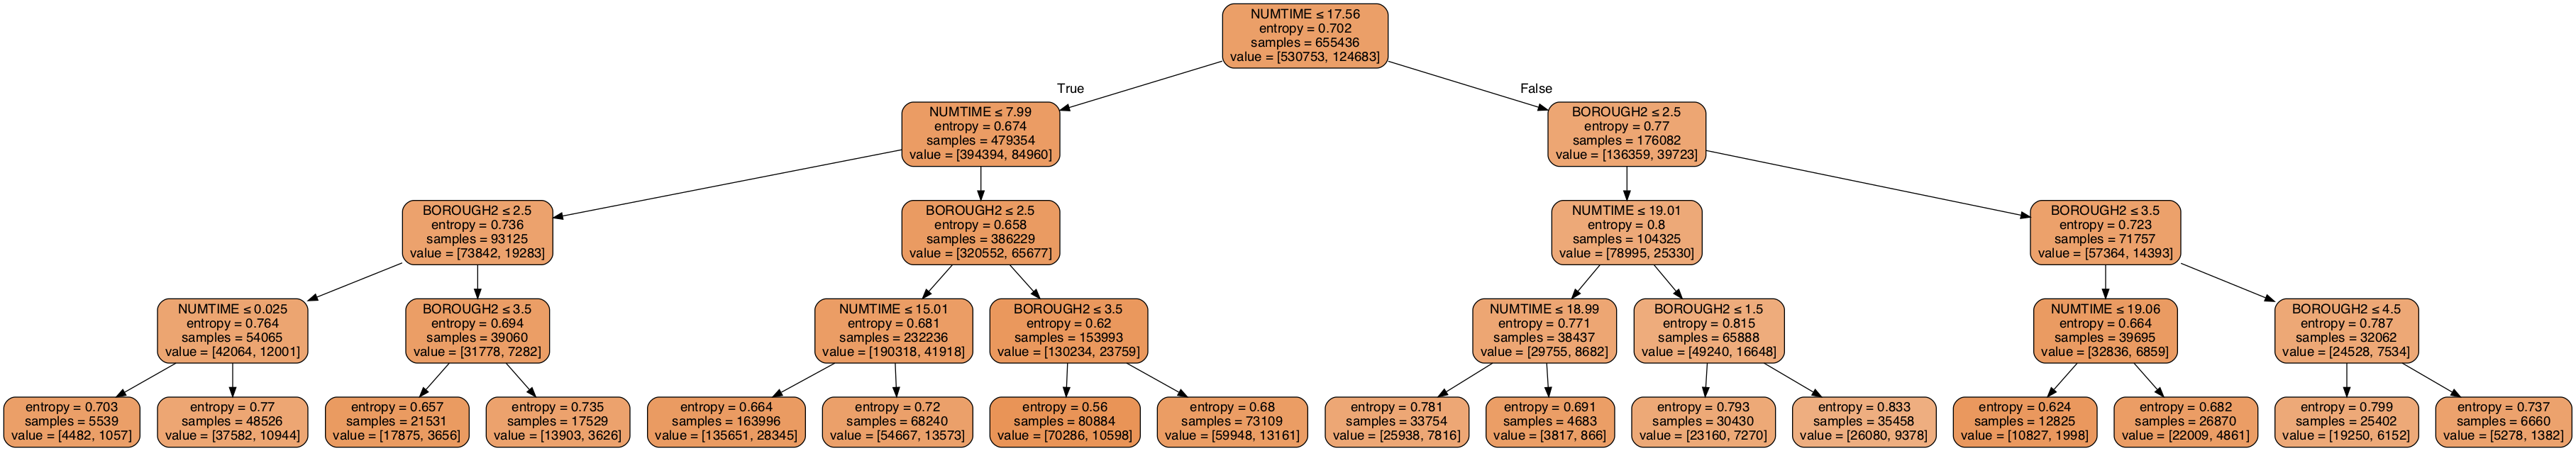

In [9]:
X_feat = data[['NUMTIME','BOROUGH2']]
y = data['affected']
t = DecisionTreeClassifier(max_depth=4,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [10]:
X_feat = data[['NUMTIME','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.808487
2   0.808487
3   0.808487
4   0.808487
5   0.808487
10  0.808335
15  0.808167
20  0.807900
25  0.807725
30  0.807656


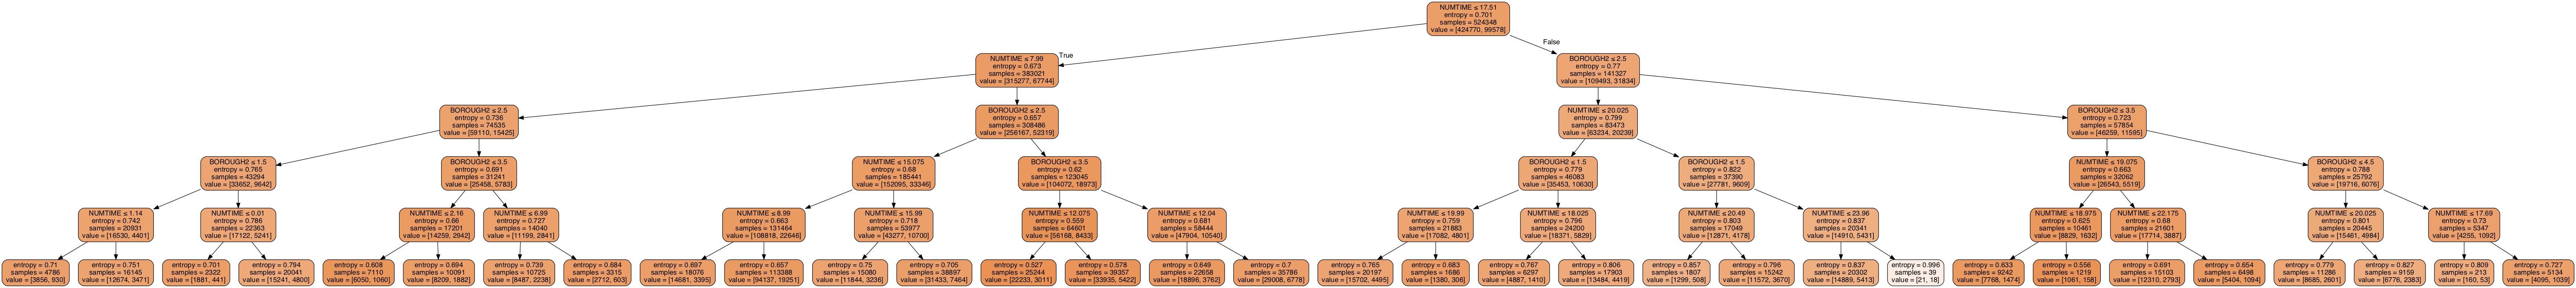

In [11]:
t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [12]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH2'], 'importance':t.feature_importances_})


,feature,importance
0,NUMTIME,0.579539
1,BOROUGH2,0.420461


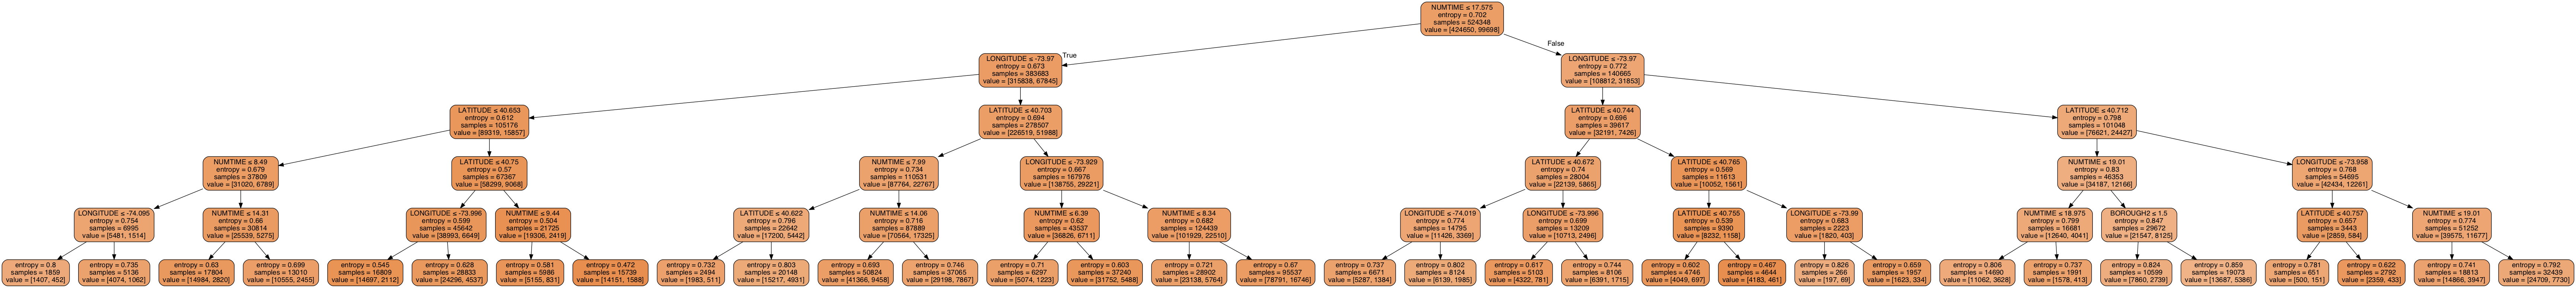

In [13]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})



,feature,importance
0,NUMTIME,0.415523
1,BOROUGH,0.003461
2,LATITUDE,0.296658
3,LONGITUDE,0.284358


In [15]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3,4]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  7.5min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,5,1,10,0.809772
1,gini,1,1,10,0.809771
2,entropy,2,1,60,0.809771
3,entropy,2,2,20,0.809771
4,entropy,2,2,30,0.809771
5,entropy,2,2,40,0.809771
6,entropy,2,2,50,0.809771
7,entropy,2,2,60,0.809771
8,entropy,2,3,10,0.809771
9,entropy,2,3,20,0.809771


In [16]:
X_feat = data[['NUMTIME','BOROUGH2']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.3min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,2,1,20,0.809771
2,entropy,3,1,20,0.809771
3,entropy,3,1,10,0.809771
4,entropy,2,2,60,0.809771
5,entropy,2,2,50,0.809771
6,entropy,2,2,40,0.809771
7,entropy,2,2,30,0.809771
8,entropy,2,2,20,0.809771
9,entropy,2,2,10,0.809771


In [17]:
X_feat = data[['NUMTIME','LATITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.0min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,3,1,60,0.809771
2,entropy,3,1,40,0.809771
3,entropy,3,1,30,0.809771
4,entropy,3,1,20,0.809771
5,entropy,3,1,10,0.809771
6,entropy,2,2,60,0.809771
7,entropy,2,2,50,0.809771
8,entropy,2,2,40,0.809771
9,entropy,2,2,30,0.809771


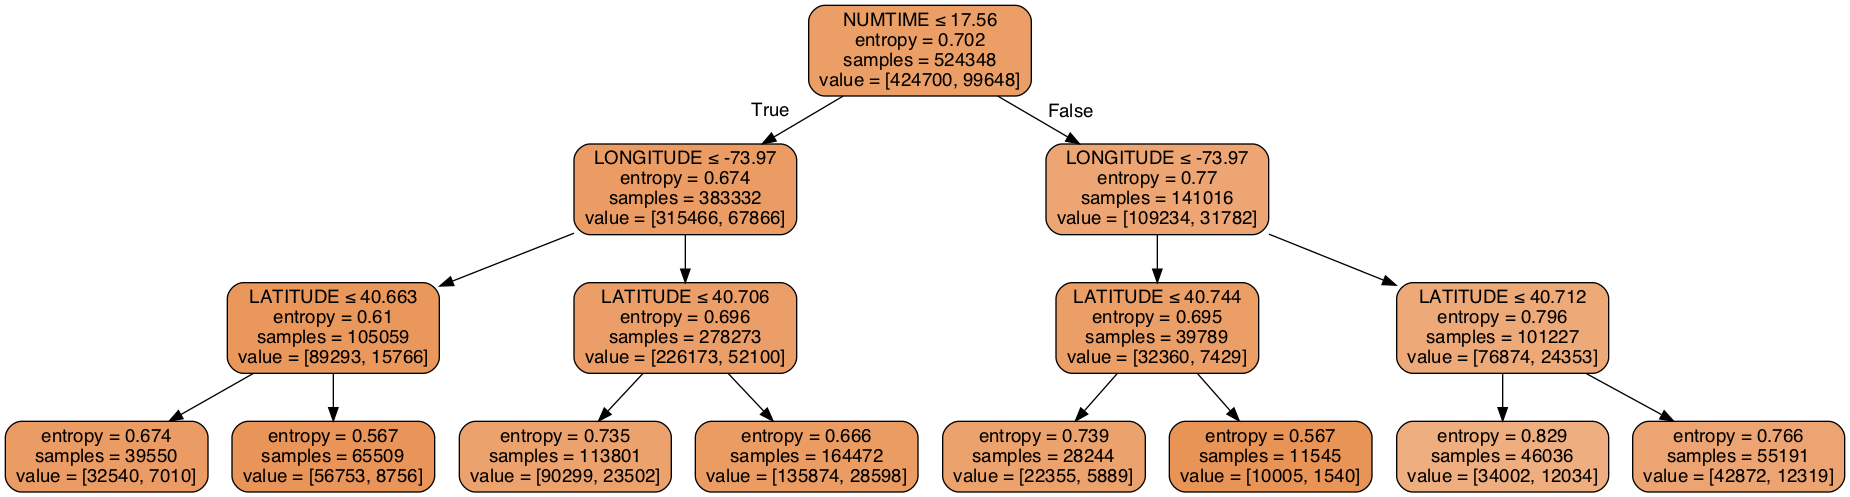

In [29]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [19]:
conda install graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


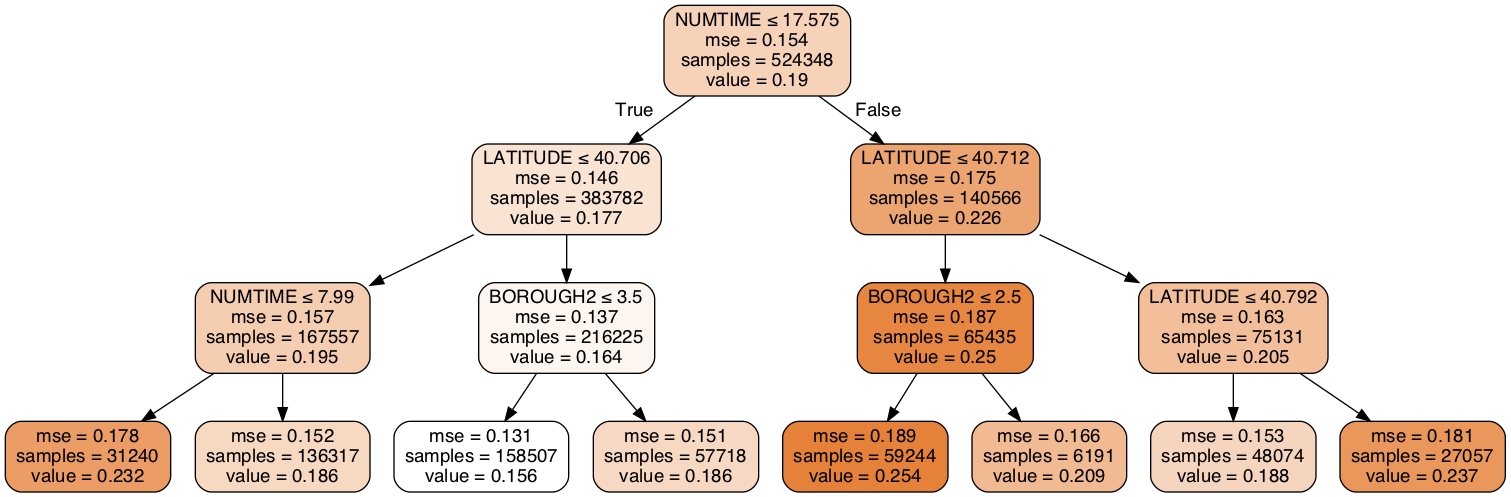

In [44]:
X_feat = data[['NUMTIME','LATITUDE','LATITUDE','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE','LONGITUDE','BOROUGH2'], 'importance':t.feature_importances_})



,feature,importance
0,NUMTIME,0.542002
1,LATITUDE,0.228716
2,LONGITUDE,0.127306
3,BOROUGH2,0.101977


In [ ]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

In [31]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})


,feature,importance
0,NUMTIME,0.604763
1,LATITUDE,0.130166
2,LONGITUDE,0.265071


In [37]:
#get data
X_feat = data[['NUMTIME','LONGITUDE']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))


test error for slump:  0.4396404706678847


In [38]:
#get data
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE','BOROUGH2']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))



KeyboardInterrupt: 

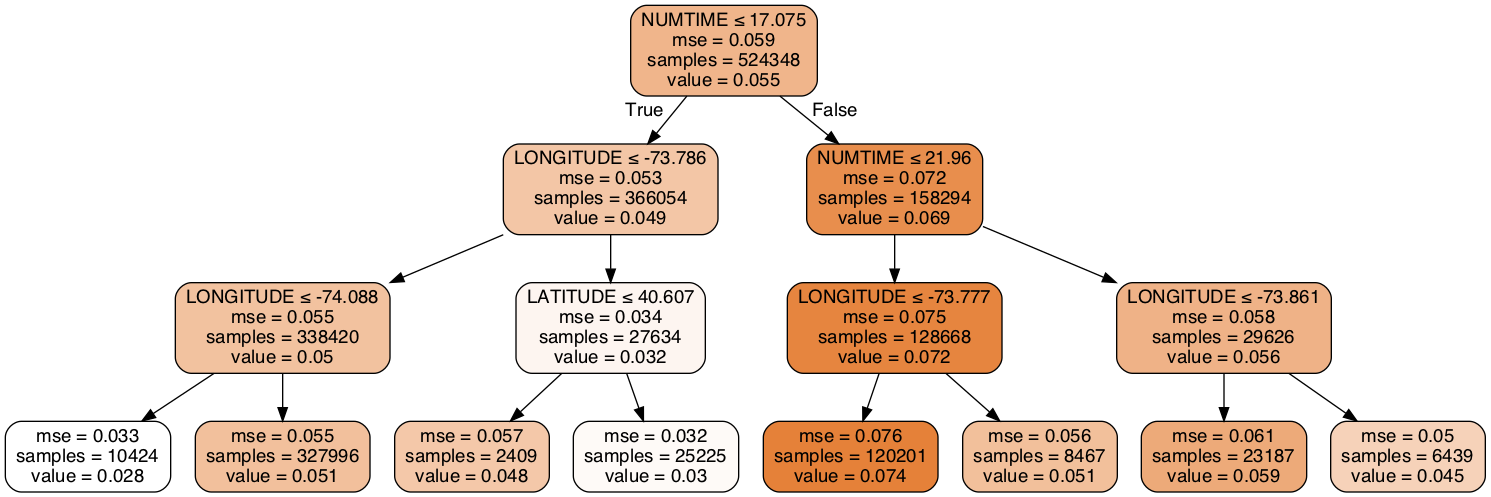

In [39]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.001306
2   0.001708
3   0.002075
4   0.002151
5   0.000124
10 -0.016784
15 -0.067727
20 -0.217377
25 -0.462097
30 -0.689049


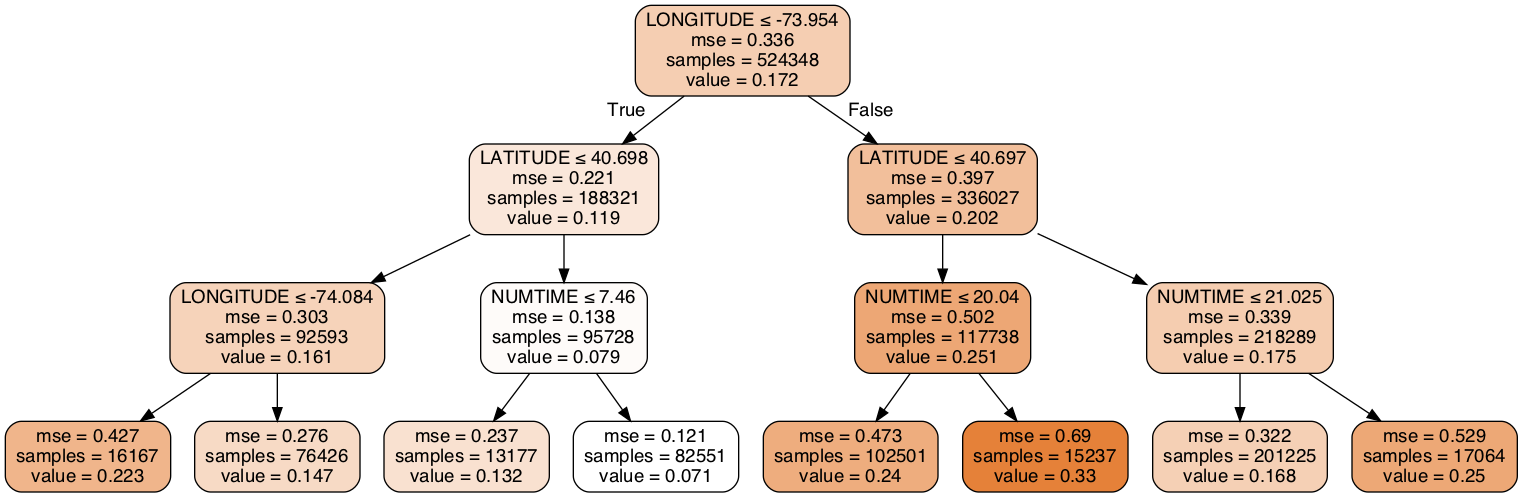

In [40]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.005012
2   0.009587
3   0.010941
4   0.012383
5   0.012883
10 -0.006980
15 -0.107595
20 -0.414957
25 -0.703795
30 -0.921434


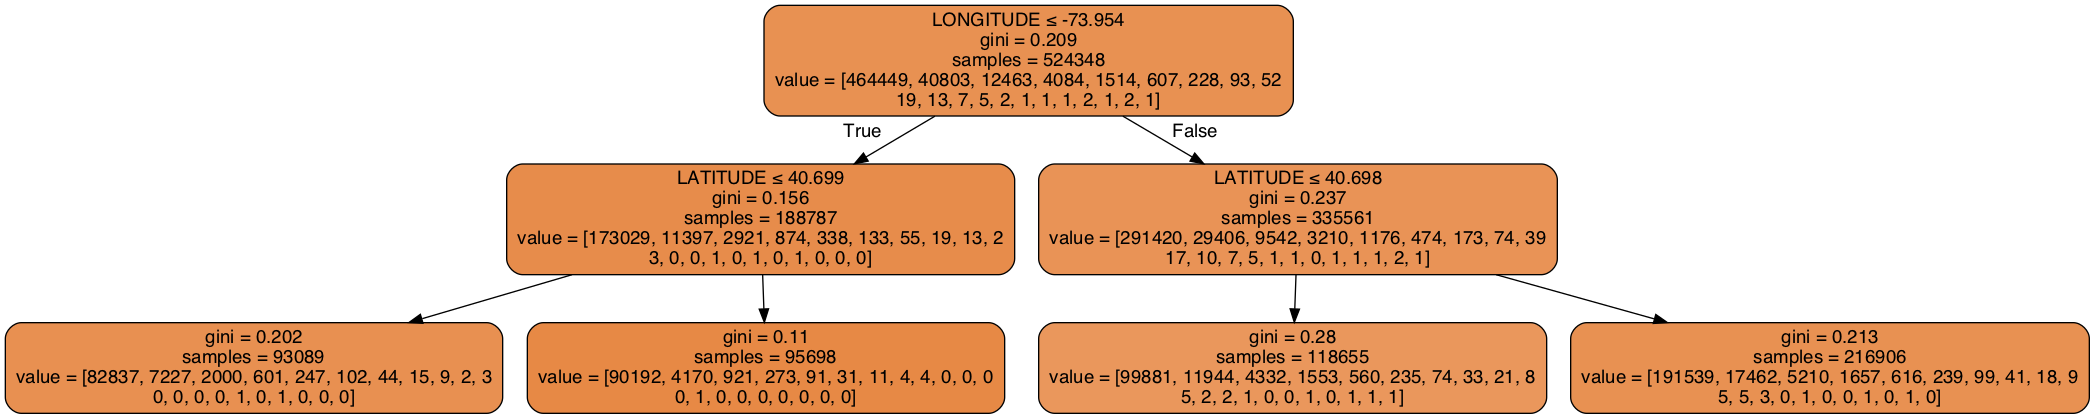

In [62]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [72]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.886260
2   0.886260
3   0.886260
4   0.886260
5   0.886260
10  0.885420
15  0.880218
20  0.865609
25  0.840207
30  0.816421


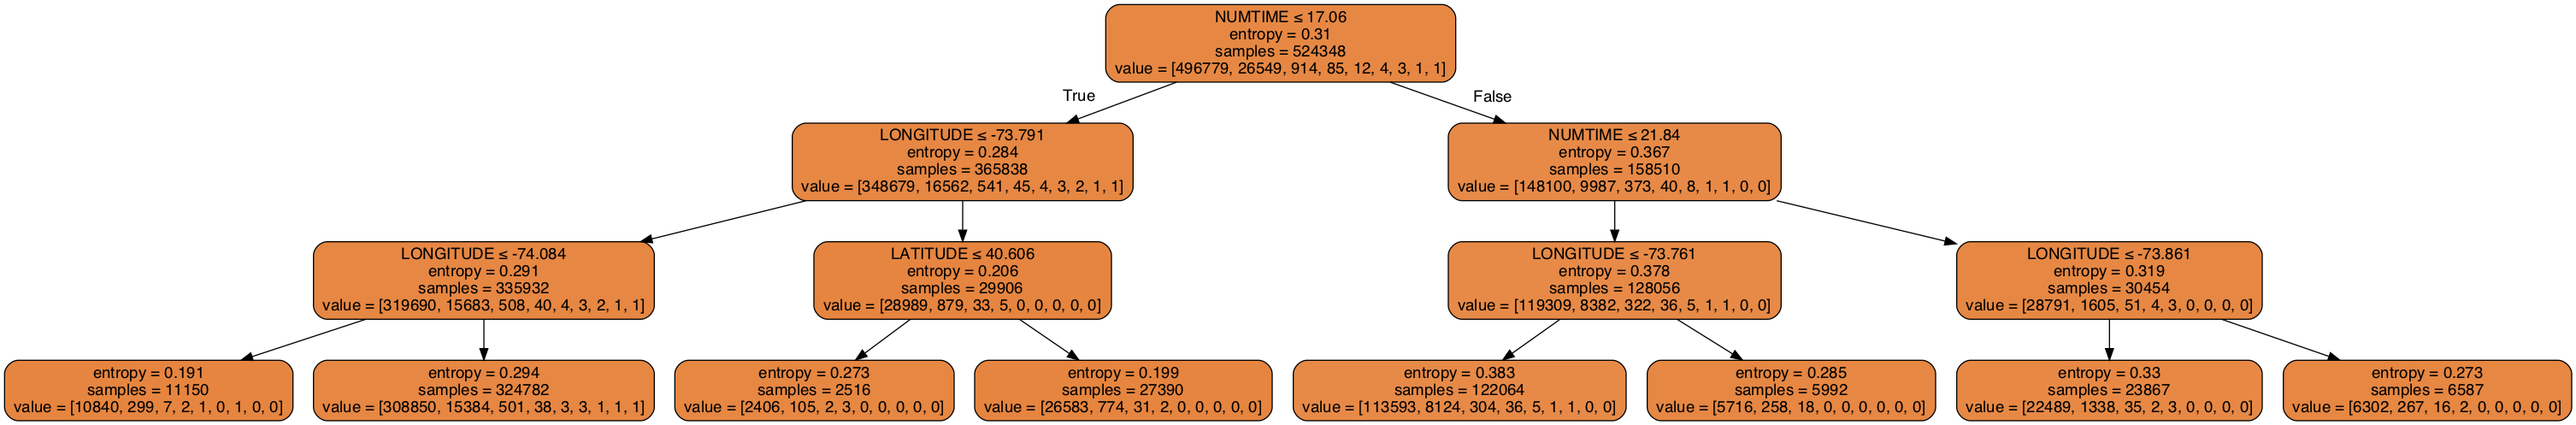

In [54]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [68]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.947539
2   0.947539
3   0.947539
4   0.947531
5   0.947524
10  0.947112
15  0.944457
20  0.937523
25  0.926385
30  0.913943


In [69]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.05490205053094105


In [57]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF PEDESTRIANS INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.7min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.947394
1,entropy,3,3,60,0.947394
2,entropy,3,3,40,0.947394
3,entropy,3,3,30,0.947394
4,entropy,3,3,20,0.947394
5,entropy,3,3,10,0.947394
6,entropy,3,2,60,0.947394
7,entropy,3,2,50,0.947394
8,entropy,3,2,40,0.947394
9,entropy,3,2,30,0.947394


In [58]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF MOTORIST INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.4min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.885945
1,entropy,3,1,10,0.885945
2,entropy,3,2,20,0.885945
3,entropy,3,2,10,0.885945
4,entropy,3,1,60,0.885945
5,entropy,3,1,50,0.885945
6,entropy,3,1,40,0.885945
7,entropy,3,1,30,0.885945
8,entropy,3,1,20,0.885945
9,entropy,2,3,60,0.885945


In [60]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['affected']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.8min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,3,2,20,0.809771
2,entropy,2,1,60,0.809771
3,entropy,2,2,10,0.809771
4,entropy,2,2,20,0.809771
5,entropy,2,2,30,0.809771
6,entropy,2,2,40,0.809771
7,entropy,2,2,50,0.809771
8,entropy,2,2,60,0.809771
9,entropy,2,3,10,0.809771


In [85]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF CYCLIST INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.5min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,entropy,20,2,20,0.976193
1,gini,1,1,10,0.976191
2,entropy,3,2,50,0.976191
3,entropy,4,1,10,0.976191
4,entropy,3,3,60,0.976191
5,entropy,3,3,50,0.976191
6,entropy,3,3,40,0.976191
7,entropy,3,3,30,0.976191
8,entropy,3,3,20,0.976191
9,entropy,3,3,10,0.976191


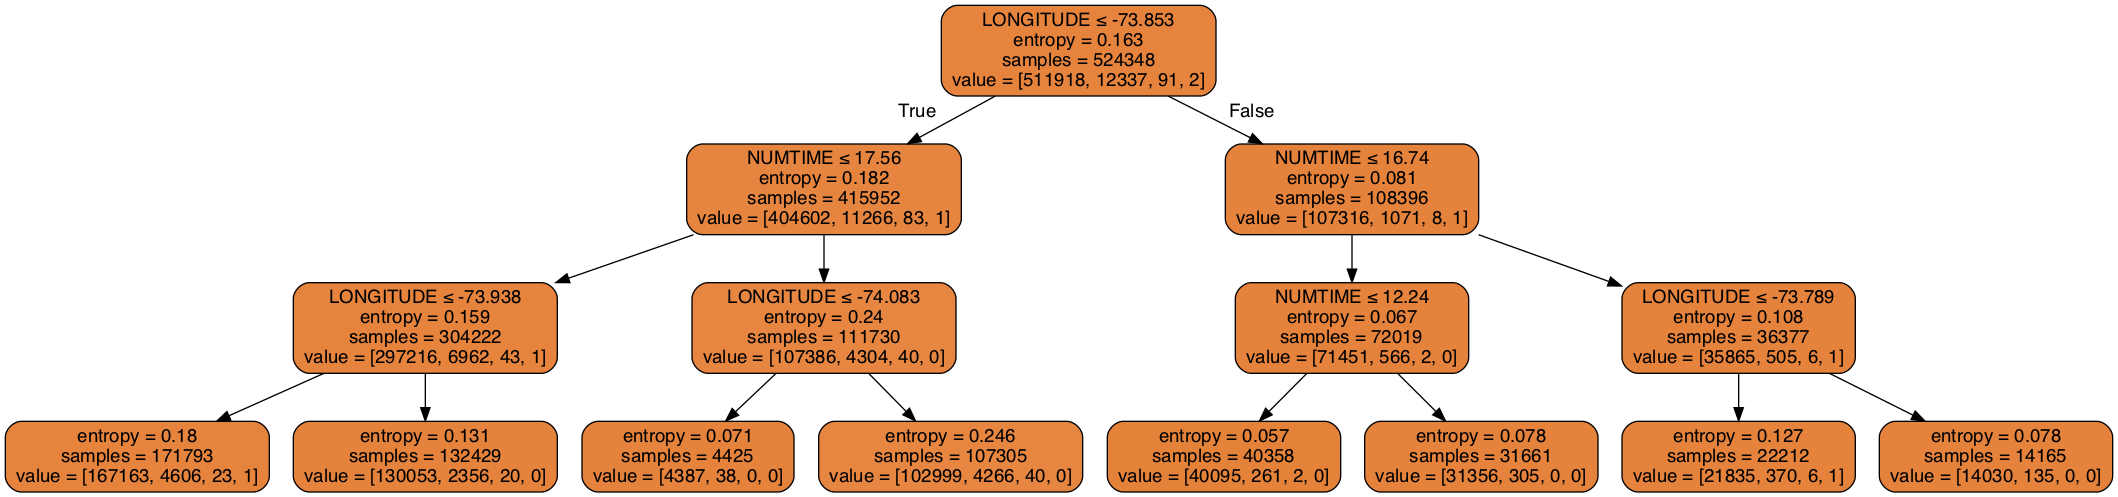

In [87]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [88]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.976214
2   0.976214
3   0.976214
4   0.976214
5   0.976214
10  0.975856
15  0.973270
20  0.967686
25  0.961064
30  0.955854


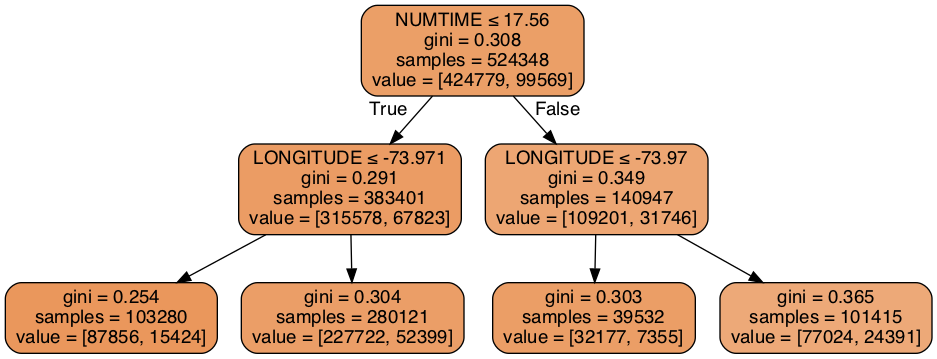

In [63]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.809891
2   0.809891
3   0.809891
4   0.809891
5   0.809891
10  0.808739
15  0.800142
20  0.779949
25  0.752876
30  0.727206


In [67]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.19010893445624313


In [65]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.002707
2   0.004618
3   0.007372
4   0.008356
5   0.009436
10  0.004553
15 -0.060795
20 -0.221760
25 -0.457263
30 -0.674882


In [82]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

Null accuracy on the test set:  0.05480288050775052
Sensitivity/Recall (TPR):  0.9475619431221775
Precision (PPV):  0.9475619431221775


In [83]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

Null accuracy on the test set:  0.19022336140607837
Sensitivity/Recall (TPR):  0.8097766385939217
Precision (PPV):  0.8097766385939217


In [84]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

Null accuracy on the test set:  0.17106829000366167
Sensitivity/Recall (TPR):  0.8865037226901014
Precision (PPV):  0.8865037226901014


In [89]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

Null accuracy on the test set:  0.02366349322592457
Sensitivity/Recall (TPR):  0.9765348468204564
Precision (PPV):  0.9765348468204564


In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pr)
cm